#### Feature Selection with Hypothesis Testing and Feature Ranking

Some part of this notebook were taken feom Kaggle. We put them in the references.

After exploration statistical test we decide to use the Hypothesis testing and Significance (Statsmodels) and Machine learning method (Feature ranking) to compare with the article 'comprehensive-data-exploration-with-python' from kaggle.
In case of Top-5 accuracy, the result of (LOG-Features + Hypothesis testing(Non-scaling) + Feature ranking) show that 3/4 are correctly rank. 

In [5]:
'''
ref
https://www.kaggle.com/arthurtok/feature-ranking-rfe-random-forest-linear-models
https://en.wikipedia.org/wiki/Feature_selection
https://chrisalbon.com/machine_learning/linear_regression/effect_of_alpha_on_lasso_regression/

# dataset explantion
------------------------------------------------------------



https://stats.stackexchange.com/questions/346720/can-log-likelihood-function-be-negative

ignificance p-value
Multicolinearlity
backward, forward, stepwise

https://www.kaggle.com/codename007/home-credit-complete-eda-feature-importance
'''

'\nref\nhttps://www.kaggle.com/arthurtok/feature-ranking-rfe-random-forest-linear-models\nhttps://en.wikipedia.org/wiki/Feature_selection\nhttps://chrisalbon.com/machine_learning/linear_regression/effect_of_alpha_on_lasso_regression/\n\n# dataset explantion\n------------------------------------------------------------\n\nhttps://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python\nhttps://stats.stackexchange.com/questions/346720/can-log-likelihood-function-be-negative\n\nignificance p-value\nMulticolinearlity\nbackward, forward, stepwise\n\nhttps://www.kaggle.com/codename007/home-credit-complete-eda-feature-importance\n'

In [6]:
cd House-Prices-Advanced-Regression-Techniques/

[WinError 2] 指定されたファイルが見つかりません。: 'House-Prices-Advanced-Regression-Techniques/'
C:\Users\New\Desktop\Data science in Action


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (RidgeCV, LassoCV)
import warnings
warnings.filterwarnings('ignore')

## aaa

In [8]:
ls

 Volume in drive C is Windows
 Volume Serial Number is BADD-F258

 Directory of C:\Users\New\Desktop\Data science in Action

2019/05/23  09:44    <DIR>          .
2019/05/23  09:44    <DIR>          ..
2019/05/23  09:07    <DIR>          .ipynb_checkpoints
2019/05/22  12:32           196,635 60556224_10161866639450416_1618702345556721664_o.jpg
2019/05/22  12:40           298,082 61211556_10161866637605416_8261149446717308928_o.jpg
2019/05/22  12:58    <DIR>          Dataset
2019/05/23  09:42           713,695 house-prices-prediction-using-keras.ipynb
2019/05/23  09:44           569,177 Hypothesis testing +  Feature Ranking for House Prices Advanced Regression Techniques dataset.ipynb
2019/05/23  09:12            23,209 submission.csv
2019/05/22  12:20               846 Untitled.ipynb
2019/05/22  12:17    <DIR>          wall
               6 File(s)      1,801,644 bytes
               5 Dir(s)  398,103,973,888 bytes free


In [9]:
df_train = pd.read_csv('Dataset/House-Prices-Advanced-Regression-Techniques-master/train.csv')
'''
The important features would be
- OverallQual
- YearBuilt.
- TotalBsmtSF.
- GrLivArea.
'''

'\nThe important features would be\n- OverallQual\n- YearBuilt.\n- TotalBsmtSF.\n- GrLivArea.\n'

#### <font color = lightblue>Define Functions

In [10]:
def getting_mean_from_table(size_row, list_start):
    for i in range(size_row):
        mean = round(feature_matrix_du.iloc[i,:].mean(), 2)
        list_start.append(mean)
    return list_start


def distribution_and_QQ5(df,A,B,C,D,E):
    l = [A,B,C,D,E]
    x = 1; y = len(l)+1
    plt.figure(figsize=(18, 4))
    for i in l:
        plt.subplot(2,5,x)
        sns.distplot(df[i], fit=norm, fit_kws={"color":"c"}, color = 'y')
        plt.tight_layout()

        plt.subplot(2,5,y)
        stats.probplot(df[i], plot=plt)
        plt.tight_layout()
        
        x += 1
        y += 1

        
def distribution_and_QQ4(df,A,B,C,D):
    l = [A,B,C,D]
    x = 1; y = len(l)+1
    plt.figure(figsize=(18, 4))
    for i in l:
        plt.subplot(2,5,x)
        sns.distplot(df[i], fit=norm, fit_kws={"color":"c"}, color = 'y')
        plt.tight_layout()

        plt.subplot(2,5,y)
        stats.probplot(df[i], plot=plt)
        plt.tight_layout()
        
        x += 1
        y += 1        

### Data preparation

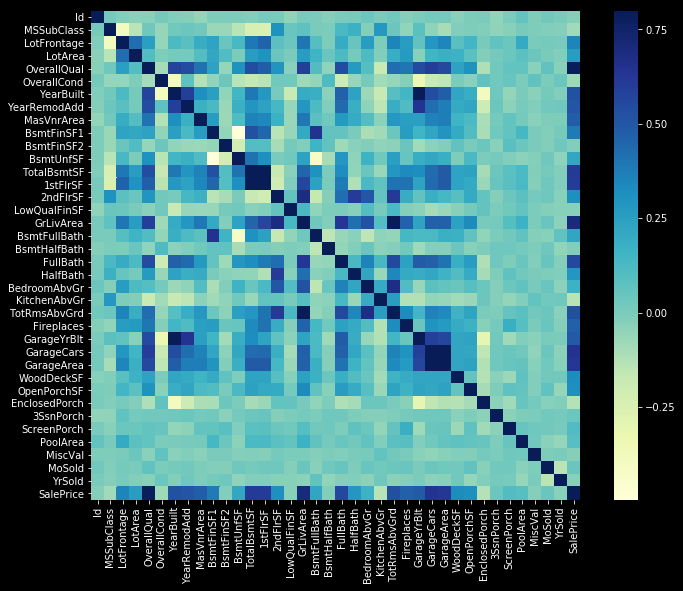

In [11]:
plt.style.use(['dark_background'])
corrmat = df_train.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu");
# see https://docs.google.com/presentation/d/1t_2EtHOTa4YX9dKgse4wCJW7Y_kraryjsurGyPlHoug/edit?usp=sharing

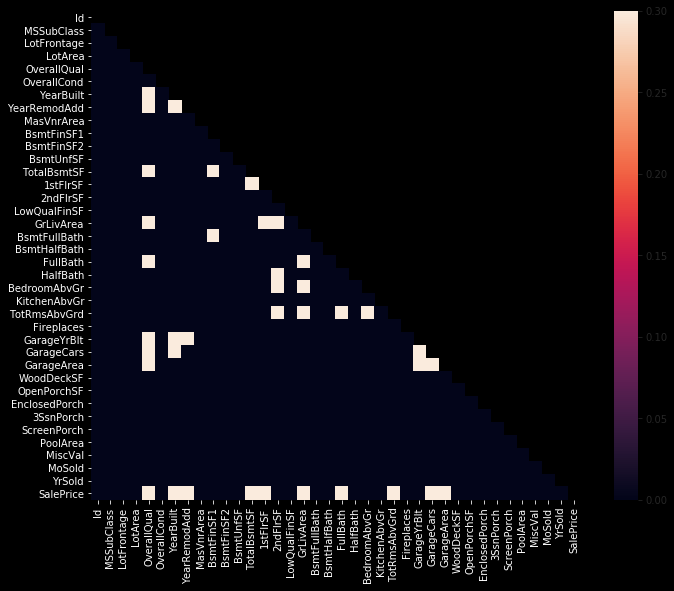

In [15]:
plt.style.use(['dark_background'])
corrmat_05 = corrmat > 0.5
plt.subplots(figsize=(12, 9))
mask = np.zeros_like(corrmat_05)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
        ax = sns.heatmap(corrmat_05, mask=mask, vmax=.3, square=True)
# As we can see, there are 11 the coorelation coefficient which high related to 'SalePrice' 

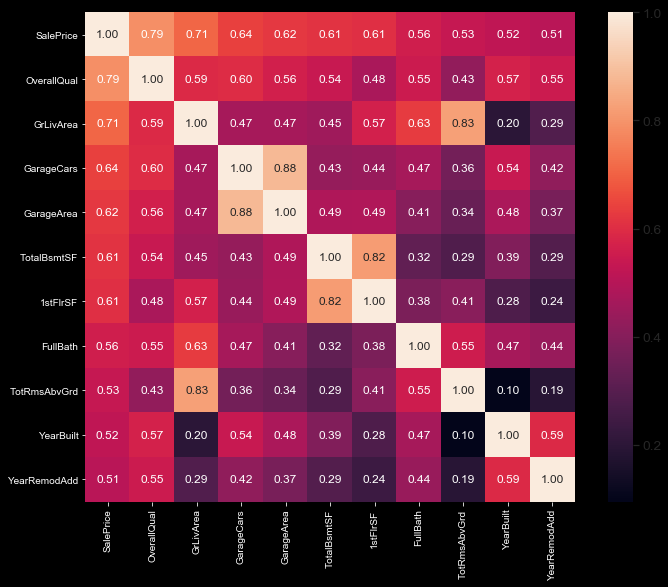

In [16]:
#saleprice correlation matrix
plt.subplots(figsize=(12, 9))
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

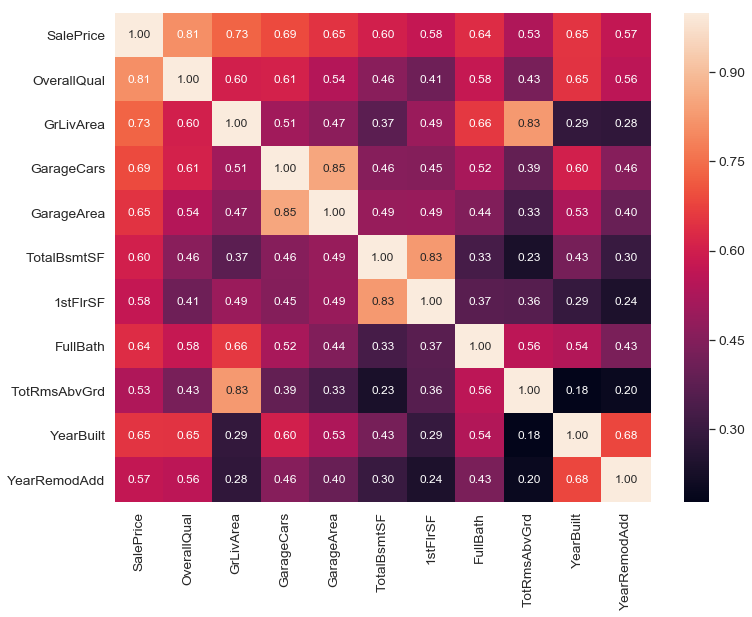

In [17]:
# Spearman for non-normal distribution
plt.subplots(figsize=(12, 9))
sns.heatmap(df_train.loc[:,cols].corr(method='spearman'), annot=True, fmt='.2f',annot_kws={'size': 12})
# https://stackoverflow.com/questions/45843761/spearman-correlation-with-corrwith-python

In [18]:
df_train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [20]:
# To simplify problem, we will delete all of missing value and corresponding value in each feature

#dealing with missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #checking that there's no missing data missing...

0

In [21]:
df_train_numeric = df_train.select_dtypes(include=['int64', 'float64'])
df_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 35 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
BsmtFinSF1       1459 non-null int64
BsmtFinSF2       1459 non-null int64
BsmtUnfSF        1459 non-null int64
TotalBsmtSF      1459 non-null int64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BsmtFullBath     1459 non-null int64
BsmtHalfBath     1459 non-null int64
FullBath         1459 non-null int64
HalfBath         1459 non-null int64
BedroomAbvGr     1459 non-null int64
KitchenAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-null int64
Fireplaces       1459 non-null int64
GarageCars       1459 non-null int64
Garag

### Outlier detection with IsolationForest

In [22]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', verbose=2, bootstrap = False, n_jobs=-1, random_state=42)
iso_forest.fit(df_train_numeric)
predict = iso_forest.predict(df_train_numeric)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished


Building estimator 1 of 9 for this parallel run (total 100)...
Building estimator 1 of 9 for this parallel run (total 100)...
Building estimator 1 of 9 for this parallel run (total 100)...
Building estimator 1 of 9 for this parallel run (total 100)...
Building estimator 1 of 8 for this parallel run (total 100)...
Building estimator 1 of 8 for this parallel run (total 100)...
Building estimator 1 of 8 for this parallel run (total 100)...Building estimator 1 of 8 for this parallel run (total 100)...Building estimator 1 of 8 for this parallel run (total 100)...
Building estimator 1 of 8 for this parallel run (total 100)...
Building estimator 1 of 8 for this parallel run (total 100)...


Building estimator 1 of 8 for this parallel run (total 100)...
Building estimator 2 of 8 for this parallel run (total 100)...
Building estimator 2 of 9 for this parallel run (total 100)...
Building estimator 2 of 8 for this parallel run (total 100)...
Building estimator 2 of 8 for this parallel run (total 

In [23]:
df_train['anomaly'] = predict
df_train_numeric['anomaly'] = predict

In [24]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,anomaly
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,1


In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

In [26]:
# https://www.kaggle.com/ffisegydd/sklearn-multicollinearity-class
# Multicolinearity detector

from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [27]:
df_without_outlier = df_train[df_train['anomaly'] == 1]
df_numeric_without_outlier = df_train_numeric[df_train_numeric['anomaly'] == 1]

df_numeric_without_outlier = df_numeric_without_outlier.drop(['anomaly', 'Id'], axis =1)
indepen_va = df_numeric_without_outlier.drop(['SalePrice'], axis =1)
tar_va = df_numeric_without_outlier.SalePrice

## Hypothesis testing

In [28]:
import statsmodels.api as sm
'''
endog => y (target)
exog => x (independent variable)

AIC = 2k + 2log(L)
    = 2(num of parameters) + 2(log-likelihood) 
    = complexity + how well model get explain the data

Dubin-Watson:
    A value of 2.0 means there is no autocorrelation detected in the sample. 
Values from zero to 2.0 indicate positive autocorrelation and values 
from 2.0 to 4.0 indicate negative autocorrelation.
'''

'\nendog => y (target)\nexog => x (independent variable)\n\nAIC = 2k + 2log(L)\n    = 2(num of parameters) + 2(log-likelihood) \n    = complexity + how well model get explain the data\n\nDubin-Watson:\n    A value of 2.0 means there is no autocorrelation detected in the sample. \nValues from zero to 2.0 indicate positive autocorrelation and values \nfrom 2.0 to 4.0 indicate negative autocorrelation.\n'

In [29]:
multi_regressor = sm.OLS(tar_va, indepen_va).fit()
print(multi_regressor.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2793.
Date:                Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                        09:45:54   Log-Likelihood:                -15013.
No. Observations:                1313   AIC:                         3.009e+04
Df Residuals:                    1282   BIC:                         3.025e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass     -122.1588     19.605     -6.231

In [30]:
# transformer = ReduceVIF()
# non_multico = transformer.fit_transform(indepen_va, tar_va)

In [31]:
df_numeric_without_outlier.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [32]:
# remove insig features
feature_drop = df_numeric_without_outlier.drop(columns = ['BsmtUnfSF','LowQualFinSF','FullBath', 
                                                             'HalfBath','KitchenAbvGr','Fireplaces',
                                                             'GarageCars','OpenPorchSF', 'EnclosedPorch',
                                                            'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'SalePrice'], axis=1)
multi_regressor_insig = sm.OLS(tar_va, feature_drop).fit()
print(multi_regressor_insig.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     4261.
Date:                Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                        09:45:54   Log-Likelihood:                -15029.
No. Observations:                1313   AIC:                         3.010e+04
Df Residuals:                    1293   BIC:                         3.020e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
MSSubClass    -124.5261     19.120     -6.513   

In [33]:
log_feature_drop = np.log(feature_drop)
# sine somefeature contain 'Nan' so, we will remove all of that features
log_feature_drop.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,3SsnPorch,YrSold
count,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,3.749329,9.077007,1.776206,1.700120,7.587063,7.593304,-inf,-inf,-inf,6.982837,-inf,7.230788,-inf,-inf,-inf,1.816897,-inf,-inf,-inf,7.604798
std,0.693250,0.481484,0.228101,0.191453,0.014630,0.010446,NaN,NaN,NaN,0.294988,NaN,0.301498,NaN,NaN,NaN,0.223118,NaN,NaN,NaN,0.000661
min,2.995732,7.170120,0.000000,0.000000,7.539027,7.575585,-inf,-inf,-inf,6.082219,-inf,6.082219,-inf,-inf,-inf,1.098612,-inf,-inf,-inf,7.603898
25%,2.995732,8.922658,1.609438,1.609438,7.578145,7.583756,NaN,NaN,6.675823,6.763885,NaN,7.013915,NaN,NaN,0.693147,1.609438,5.789960,NaN,NaN,7.604396
50%,3.912023,9.139596,1.791759,1.609438,7.587817,7.597898,5.950643,NaN,6.882437,6.968850,NaN,7.257708,NaN,NaN,1.098612,1.791759,6.161207,NaN,NaN,7.604894
75%,4.094345,9.331407,1.945910,1.791759,7.601402,7.602900,6.546785,NaN,7.135687,7.199678,6.553933,7.444249,0.000000,NaN,1.098612,1.945910,6.356108,5.123964,NaN,7.605392
max,5.247024,11.653982,2.302585,2.197225,7.605392,7.605890,7.539027,7.295735,8.072779,7.706613,7.384610,7.999007,1.098612,0.693147,1.609438,2.397895,7.237059,6.601230,6.230481,7.605890


In [34]:
# change -inf to NaN then remove columns included NaN
log_feature_drop_NoNaN = log_feature_drop[~log_feature_drop.isin([np.nan, np.inf, -np.inf])].dropna(axis=1,how='any')
log_feature_drop_NoNaN.describe()

# dat.dropna(how='any')    #to drop if any value in the row has a nan
# dat.dropna(how='all')    #to drop if all values in the row are nan

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,YrSold
count,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,3.749329,9.077007,1.776206,1.700120,7.587063,7.593304,6.982837,7.230788,1.816897,7.604798
std,0.693250,0.481484,0.228101,0.191453,0.014630,0.010446,0.294988,0.301498,0.223118,0.000661
min,2.995732,7.170120,0.000000,0.000000,7.539027,7.575585,6.082219,6.082219,1.098612,7.603898
25%,2.995732,8.922658,1.609438,1.609438,7.578145,7.583756,6.763885,7.013915,1.609438,7.604396
50%,3.912023,9.139596,1.791759,1.609438,7.587817,7.597898,6.968850,7.257708,1.791759,7.604894
75%,4.094345,9.331407,1.945910,1.791759,7.601402,7.602900,7.199678,7.444249,1.945910,7.605392
max,5.247024,11.653982,2.302585,2.197225,7.605392,7.605890,7.706613,7.999007,2.397895,7.605890


In [35]:
print('Number of features before remove NaN:' ,len(log_feature_drop.columns))
print('Number of features after remove NaN:',len(log_feature_drop_NoNaN.columns))

Number of features before remove NaN: 20
Number of features after remove NaN: 10


In [36]:
# With LOG transform
log_tar_va = np.log(tar_va)
multi_regressor_log = sm.OLS(np.log(tar_va), (log_feature_drop_NoNaN)).fit()
print(multi_regressor_log.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.803e+05
Date:                Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                        09:45:55   Log-Likelihood:                 733.47
No. Observations:                1313   AIC:                            -1447.
Df Residuals:                    1303   BIC:                            -1395.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
MSSubClass      -0.0006      0.008     -0.083   

In [37]:
# TRY! non-log

non_log_feature = feature_drop.loc[:,['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                                      'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'YrSold']]
multi_regressor_non_log = sm.OLS(tar_va, non_log_feature).fit()
print(multi_regressor_non_log.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     6439.
Date:                Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                        09:45:55   Log-Likelihood:                -15215.
No. Observations:                1313   AIC:                         3.045e+04
Df Residuals:                    1303   BIC:                         3.050e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
MSSubClass    -116.9656     21.080     -5.549   

In [ ]:
non_log_featu

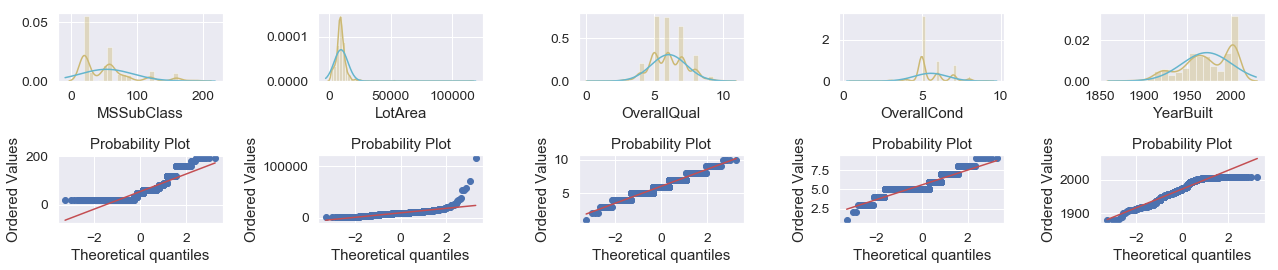

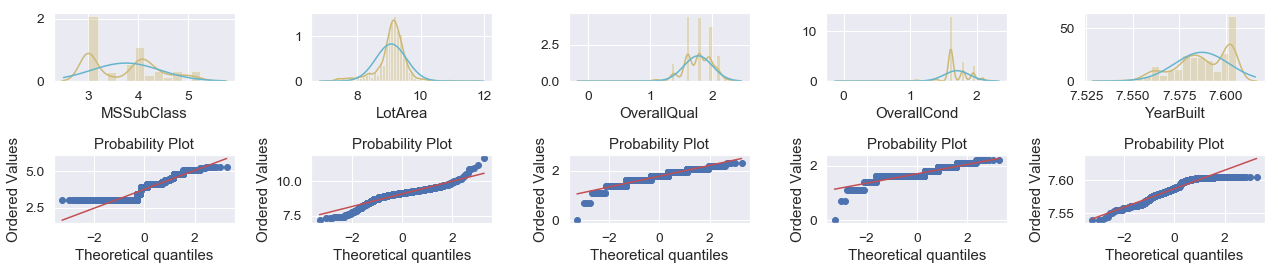

In [38]:
# LOG VS NON-LOG

distribution_and_QQ5(non_log_feature,'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt')

distribution_and_QQ5(log_feature_drop_NoNaN,'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt')

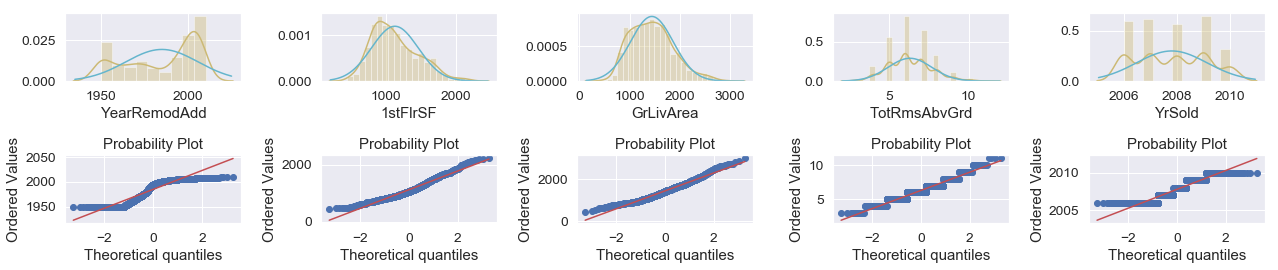

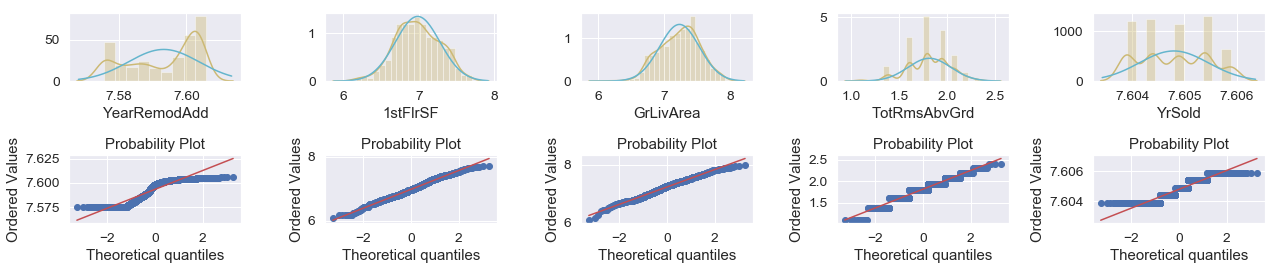

In [39]:
# LOG VS NON-LOG

distribution_and_QQ5(non_log_feature,'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'YrSold')

distribution_and_QQ5(log_feature_drop_NoNaN,'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'YrSold')

### Feature ranking
(aka, feature selection, variable selection, attribute selection or variable subset selection) is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for four reasons:

* simplification of models to make them easier to interpret by researchers/users, shorter training times,
* to avoid the curse of dimensionality,
* enhanced generalization by reducing overfitting (formally, reduction of variance))

This sort of feature ranking can be really useful, especially if one has many many features in the dataset and would like to trim or cut off features that contribute negligibly.


Manually seletion Result from: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- OverallQual
- YearBuilt.
- TotalBsmtSF.
- GrLivArea.

In [40]:
Y = df_numeric_without_outlier.SalePrice.values
df_numeric_without_outlier = df_numeric_without_outlier.drop(['SalePrice'], axis=1)
X = df_numeric_without_outlier.as_matrix()
colnames = df_numeric_without_outlier.columns

ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

lr = LinearRegression(normalize=True)
lr.fit(X,Y)
rfe = RFE(lr, n_features_to_select=1, verbose =3 ) # n_features_to_select: The number of features to select. If None, half of the features are selected.
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

feature_matrix_du = pd.DataFrame(ranks)
feature_matrix = pd.DataFrame(ranks)
feature_matrix["Mean"] = 0
feature_matrix['Mean'] = getting_mean_from_table(feature_matrix.shape[0], []);

Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 featur

In [41]:
# Feature Ranking
feature_matrix.sort_values(by=['Mean'], ascending=False).head(10)

,RFE,LinReg,Ridge,Lasso,Mean
OverallQual,1.00,0.0,1.00,1.00,0.75
BedroomAbvGr,0.75,0.0,0.53,0.54,0.46
KitchenAbvGr,0.88,0.0,0.30,0.41,0.40
GarageCars,0.97,0.0,0.30,0.32,0.40
BsmtFullBath,0.94,0.0,0.30,0.31,0.39
GrLivArea,0.50,1.0,0.00,0.00,0.38
1stFlrSF,0.44,1.0,0.00,0.00,0.36
2ndFlrSF,0.41,1.0,0.00,0.00,0.35
Fireplaces,0.84,0.0,0.22,0.22,0.32
LowQualFinSF,0.28,1.0,0.00,0.00,0.32


### Hypothesis testing + Feature ranking 

In [42]:
# Define dictionary to store our rankings
ranks = {}
# Since our algorithm can be run with numeric data only, we will use 'df_train_numeric'
Y = log_tar_va.values
D = log_feature_drop_NoNaN #.drop(['MSSubClass'], axis=1)
X = D.as_matrix()
colnames = D.columns

In [43]:
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))


In [45]:
lr = LinearRegression(normalize=True)
lr.fit(X,Y)

# RFE: recursive feature elimination
rfe = RFE(lr, n_features_to_select=1, verbose =3 ) 
# n_features_to_select: The number of features to select. If None, half of the features are selected.
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=1)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

feature_matrix_du = pd.DataFrame(ranks)
feature_matrix = pd.DataFrame(ranks)
feature_matrix["Mean"] = 0
feature_matrix['Mean'] = getting_mean_from_table(feature_matrix.shape[0], []);

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [46]:
feature_matrix.sort_values(by=['Mean'], ascending=False)

,RFE,LinReg,Ridge,Lasso,RF,Mean
OverallQual,0.67,0.04,1.00,0.09,1.00,0.56
GrLivArea,0.56,0.04,0.56,1.00,0.30,0.49
YearBuilt,0.89,0.74,0.29,0.00,0.13,0.41
YrSold,1.00,1.00,0.00,0.00,0.00,0.40
YearRemodAdd,0.78,0.21,0.16,0.00,0.04,0.24
1stFlrSF,0.33,0.02,0.32,0.00,0.11,0.16
OverallCond,0.44,0.03,0.11,0.00,0.04,0.12
LotArea,0.22,0.01,0.13,0.00,0.06,0.08
TotRmsAbvGrd,0.11,0.01,0.05,0.00,0.00,0.03
MSSubClass,0.00,0.00,0.01,0.00,0.01,0.00


In [ ]:
multi_regressor_non_log = sm.OLS(tar_va, non_log_feature).fit()
print(multi_regressor_non_log.summary())

### non - log

In [238]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

# Since our algorithm can be run with numeric data only, we will use 'df_train_numeric'
Y = tar_va.values
X = non_log_feature.as_matrix()
colnames = non_log_feature.columns

In [240]:
lr = LinearRegression(normalize=True)
lr.fit(X,Y)

# RFE: recursive feature elimination
rfe = RFE(lr, n_features_to_select=1, verbose =3 ) 
# n_features_to_select: The number of features to select. If None, half of the features are selected.
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [241]:
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=1)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

rlasso = RandomizedLasso(alpha=0.04) # The regularization parameter alpha parameter in the Lasso
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)


feature_matrix_du = pd.DataFrame(ranks)
feature_matrix = pd.DataFrame(ranks)
feature_matrix["Mean"] = 0
feature_matrix['Mean'] = getting_mean_from_table(feature_matrix.shape[0], []);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [242]:
# Non_log
feature_matrix.sort_values(by=['Mean'], ascending=False)

,RFE,LinReg,Ridge,Lasso,RF,rlasso/Stability,Mean
OverallQual,1.00,1.00,1.00,1.00,1.00,0.0,0.83
OverallCond,0.78,0.27,0.27,0.27,0.01,0.0,0.27
TotRmsAbvGrd,0.89,0.11,0.11,0.11,0.00,0.0,0.20
YearBuilt,0.67,0.03,0.03,0.03,0.07,0.0,0.14
YrSold,0.56,0.04,0.04,0.04,0.00,0.0,0.11
GrLivArea,0.22,0.00,0.00,0.00,0.25,0.0,0.08
MSSubClass,0.44,0.01,0.01,0.01,0.00,0.0,0.08
YearRemodAdd,0.33,0.01,0.01,0.01,0.03,0.0,0.07
1stFlrSF,0.11,0.00,0.00,0.00,0.10,0.0,0.04
LotArea,0.00,0.00,0.00,0.00,0.05,0.0,0.01


In [ ]:
'''
#################################################################
####################### Comparison ##############################
#################################################################
'''

In [287]:
# Feature Ranking
feature_matrix.sort_values(by=['Mean'], ascending=False).head(10)

,RFE,LinReg,Ridge,Lasso,Mean
OverallQual,1.00,0.0,1.00,1.00,0.75
BedroomAbvGr,0.75,0.0,0.54,0.55,0.46
GarageCars,0.97,0.0,0.30,0.31,0.40
GrLivArea,0.50,1.0,0.00,0.00,0.38
BsmtFullBath,0.94,0.0,0.29,0.30,0.38
KitchenAbvGr,0.88,0.0,0.26,0.35,0.37
2ndFlrSF,0.38,1.0,0.00,0.00,0.34
1stFlrSF,0.34,1.0,0.00,0.00,0.34
Fireplaces,0.84,0.0,0.22,0.22,0.32
OverallCond,0.69,0.0,0.27,0.27,0.31


In [281]:
# Hypothesis tesing + Feature Ranking
# Log - features
feature_matrix.sort_values(by=['Mean'], ascending=False)

- OverallQual
- YearBuilt.
- TotalBsmtSF.
- GrLivArea.

,RFE,LinReg,Ridge,Lasso,RF,rlasso/Stability,Mean
OverallQual,0.67,0.04,1.00,0.08,1.00,0.0,0.47
GrLivArea,0.56,0.04,0.55,1.00,0.30,0.0,0.41
YearBuilt,0.89,0.75,0.29,0.00,0.13,0.0,0.34
YrSold,1.00,1.00,0.00,0.00,0.00,0.0,0.33
YearRemodAdd,0.78,0.22,0.16,0.00,0.04,0.0,0.20
1stFlrSF,0.33,0.02,0.32,0.00,0.11,0.0,0.13
OverallCond,0.44,0.03,0.12,0.00,0.05,0.0,0.11
LotArea,0.22,0.01,0.13,0.00,0.06,0.0,0.07
TotRmsAbvGrd,0.11,0.01,0.06,0.00,0.00,0.0,0.03
MSSubClass,0.00,0.00,0.01,0.00,0.01,0.0,0.00


In [242]:
# Hypothesis tesing + Feature Ranking
# NoN - Log - features
feature_matrix.sort_values(by=['Mean'], ascending=False)

,RFE,LinReg,Ridge,Lasso,RF,rlasso/Stability,Mean
OverallQual,1.00,1.00,1.00,1.00,1.00,0.0,0.83
OverallCond,0.78,0.27,0.27,0.27,0.01,0.0,0.27
TotRmsAbvGrd,0.89,0.11,0.11,0.11,0.00,0.0,0.20
YearBuilt,0.67,0.03,0.03,0.03,0.07,0.0,0.14
YrSold,0.56,0.04,0.04,0.04,0.00,0.0,0.11
GrLivArea,0.22,0.00,0.00,0.00,0.25,0.0,0.08
MSSubClass,0.44,0.01,0.01,0.01,0.00,0.0,0.08
YearRemodAdd,0.33,0.01,0.01,0.01,0.03,0.0,0.07
1stFlrSF,0.11,0.00,0.00,0.00,0.10,0.0,0.04
LotArea,0.00,0.00,0.00,0.00,0.05,0.0,0.01


In [277]:
# Hypothesis tesing + Feature Ranking
# Log - Features
# Even we remove Log-MSSubClass The result is still the same rank
feature_matrix.sort_values(by=['Mean'], ascending=False)

,RFE,LinReg,Ridge,Lasso,RF,rlasso/Stability,Mean
OverallQual,0.62,0.04,1.00,0.08,1.00,0.0,0.46
GrLivArea,0.50,0.04,0.56,1.00,0.31,0.0,0.40
YearBuilt,0.88,0.75,0.29,0.00,0.13,0.0,0.34
YrSold,1.00,1.00,0.00,0.00,0.00,0.0,0.33
YearRemodAdd,0.75,0.21,0.16,0.00,0.04,0.0,0.19
1stFlrSF,0.25,0.01,0.31,0.00,0.11,0.0,0.11
OverallCond,0.38,0.02,0.11,0.00,0.04,0.0,0.09
LotArea,0.12,0.00,0.12,0.00,0.07,0.0,0.05
TotRmsAbvGrd,0.00,0.00,0.06,0.00,0.00,0.0,0.01


In [0]:
## All Distribution(Before Log transform)

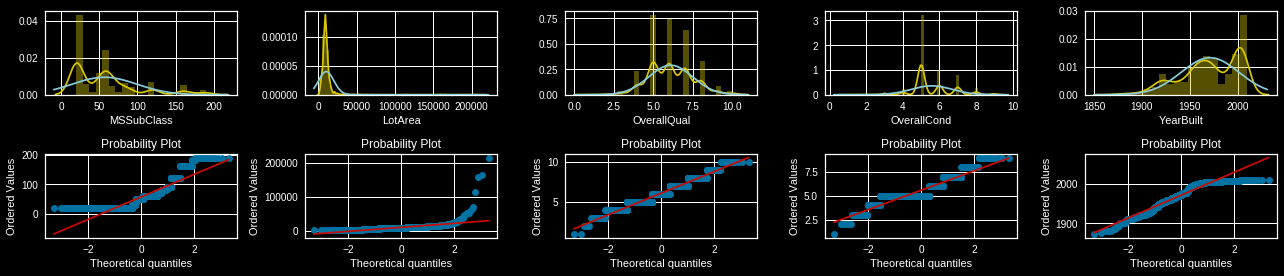

In [99]:
'''
1. 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt'

2. 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'

3. '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath'

4. 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr'

5. 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF'

6. 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'

7. 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'

'''
distribution_and_QQ5('MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt')

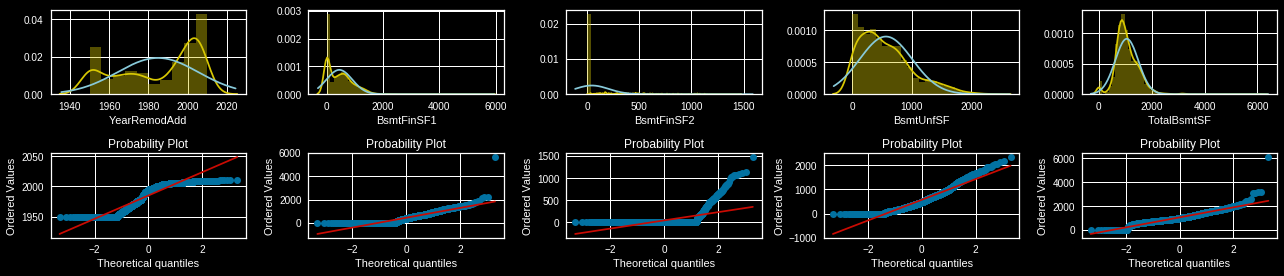

In [100]:
distribution_and_QQ5('YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF')

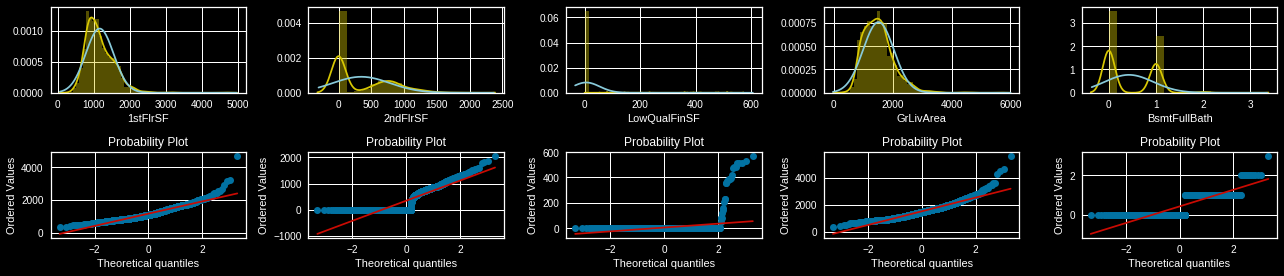

In [101]:
distribution_and_QQ5('1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath')

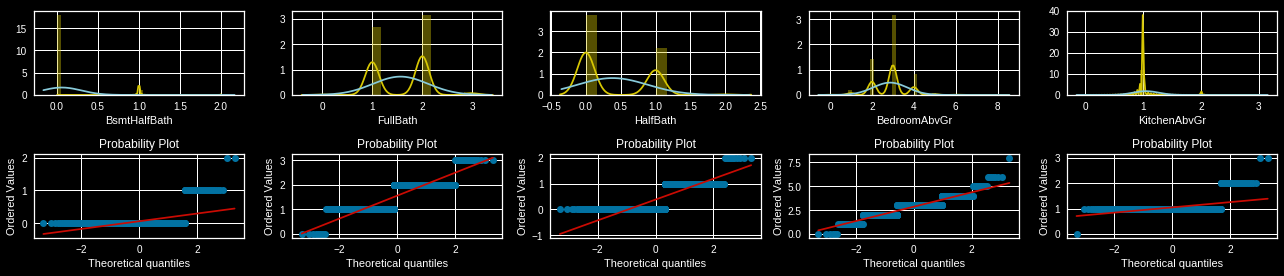

In [104]:
distribution_and_QQ5('BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr')

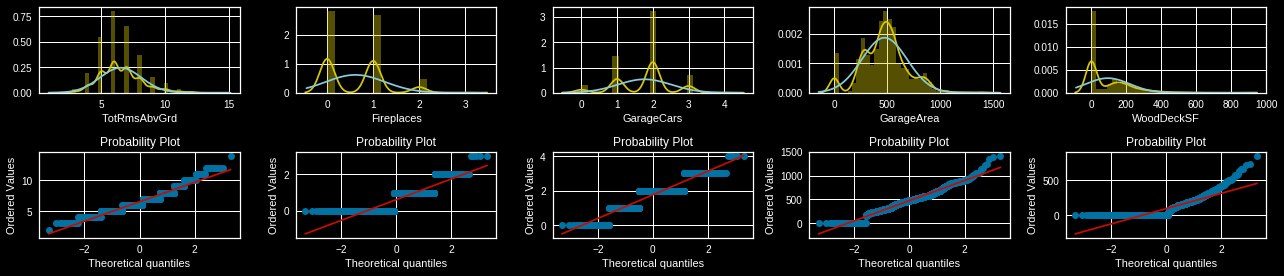

In [102]:
distribution_and_QQ5('TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF')

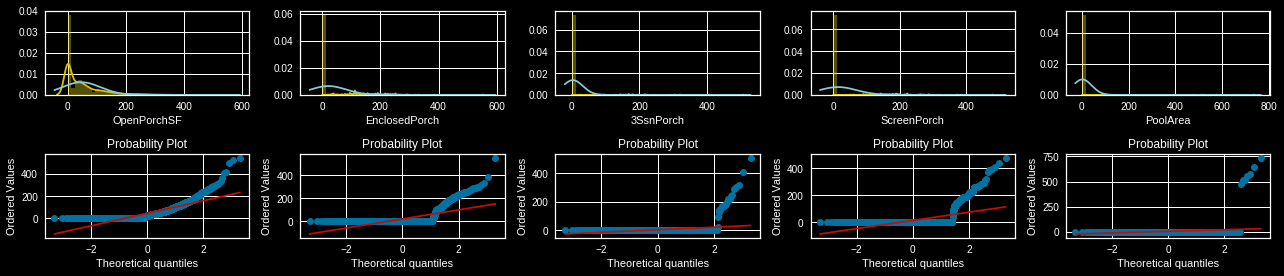

In [105]:
distribution_and_QQ5('OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea')

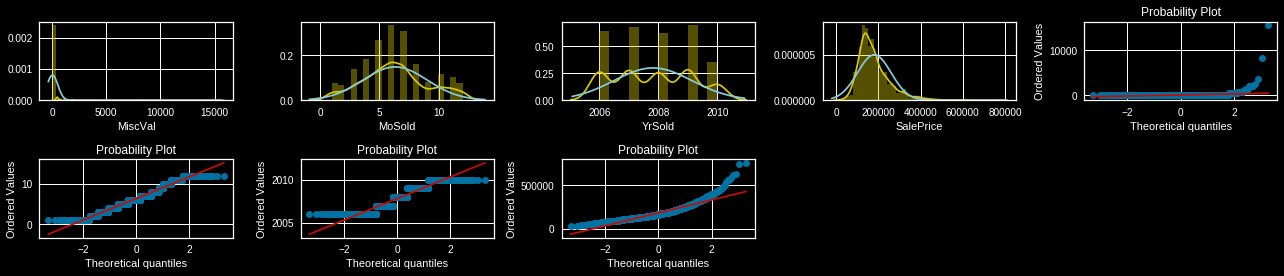

In [103]:
distribution_and_QQ4('MiscVal', 'MoSold', 'YrSold', 'SalePrice')